In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('Lenses.csv')
df.head()

,age,spectacle prescription,astigmatic,tear production rate,classes
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [5]:
df['age'].value_counts()

3    8
2    8
1    8
Name: age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EDA21A518>]],
      dtype=object)

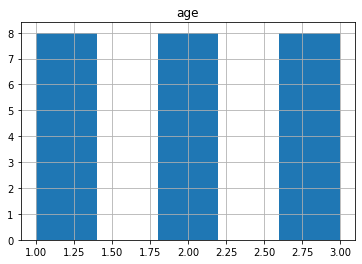

In [6]:
df.hist(column='age', bins=5)

In [7]:
df.columns

Index(['age', 'spectacle prescription', 'astigmatic', 'tear production rate',
       'classes'],
      dtype='object')

In [8]:
X = df[['age', 'spectacle prescription','astigmatic', 'tear production rate',]] .values  #.astype(float)
X[0:20]

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 2, 1],
       [1, 1, 2, 2],
       [1, 2, 1, 1],
       [1, 2, 1, 2],
       [1, 2, 2, 1],
       [1, 2, 2, 2],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 2, 1],
       [2, 1, 2, 2],
       [2, 2, 1, 1],
       [2, 2, 1, 2],
       [2, 2, 2, 1],
       [2, 2, 2, 2],
       [3, 1, 1, 1],
       [3, 1, 1, 2],
       [3, 1, 2, 1],
       [3, 1, 2, 2]], dtype=int64)

In [9]:
y = df['classes'].values
y[0:20]

array([3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1],
      dtype=int64)

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-1.22474487, -1.        , -1.        , -1.        ],
       [-1.22474487, -1.        , -1.        ,  1.        ],
       [-1.22474487, -1.        ,  1.        , -1.        ],
       [-1.22474487, -1.        ,  1.        ,  1.        ],
       [-1.22474487,  1.        , -1.        , -1.        ],
       [-1.22474487,  1.        , -1.        ,  1.        ],
       [-1.22474487,  1.        ,  1.        , -1.        ],
       [-1.22474487,  1.        ,  1.        ,  1.        ],
       [ 0.        , -1.        , -1.        , -1.        ],
       [ 0.        , -1.        , -1.        ,  1.        ]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19, 4) (19,)
Test set: (5, 4) (5,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:10]

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [ ]:
k = 5
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 